## Data Exploration

Test metadata available in l3file

In [70]:
from pathlib import Path
from metpy.io import Level3File
import numpy as np

# Open sn.last as a Level3File
l3f = Level3File('sn.last')

print(l3f.header)
print(l3f.metadata)
print(l3f.prod_desc)
print(l3f.siteID)
print(l3f.product_name)
print(l3f.max_range)
print(l3f.map_data)

payload = l3f.sym_block[0][0]
print([key for key in payload.keys()])
print(payload["end_az"])

data = l3f.map_data(payload["data"])
print(data.shape)

range_steps: int = data.shape[-1]
ranges = np.linspace(0, l3f.max_range, range_steps)
print(ranges.shape)

zipped_azimuths = zip(payload["start_az"], payload["end_az"])
for item in zipped_azimuths:
    print(item)

Product contains an unexpected amount of data remaining--have: 6514 expected: 1763909726. This product may not parse correctly.


IndexError: list index out of range

In [58]:
# Create an Xarray dataarray with the data
latitudes = xr.DataArray(ylocs, dims=["y", "x"], name="latitude")
# longitudes = xr.DataArray(xlocs, dims=["y", "x"], name="longitude")
# data = xr.DataArray(data, dims=["y", "x"], coords={"latitude": latitudes, "longitude": longitudes})

# # Set name
# data.name = "Hydrometeor Classification"

xlocs

array([[-96.367     , -96.36731293, -96.36762588, ..., -96.75823869,
        -96.75857978, -96.7589209 ],
       [-96.367     , -96.36726092, -96.36752186, ..., -96.69323957,
        -96.69352401, -96.69380848],
       [-96.367     , -96.36721404, -96.3674281 , ..., -96.63464308,
        -96.63487645, -96.63510984],
       ...,
       [-96.367     , -96.36742182, -96.36784367, ..., -96.89426903,
        -96.89472861, -96.89518823],
       [-96.367     , -96.36736484, -96.36772971, ..., -96.82310231,
        -96.82349991, -96.82389754],
       [-96.367     , -96.36731293, -96.36762588, ..., -96.75823869,
        -96.75857978, -96.7589209 ]])

ValueError: Can only specify colors with contour or levels

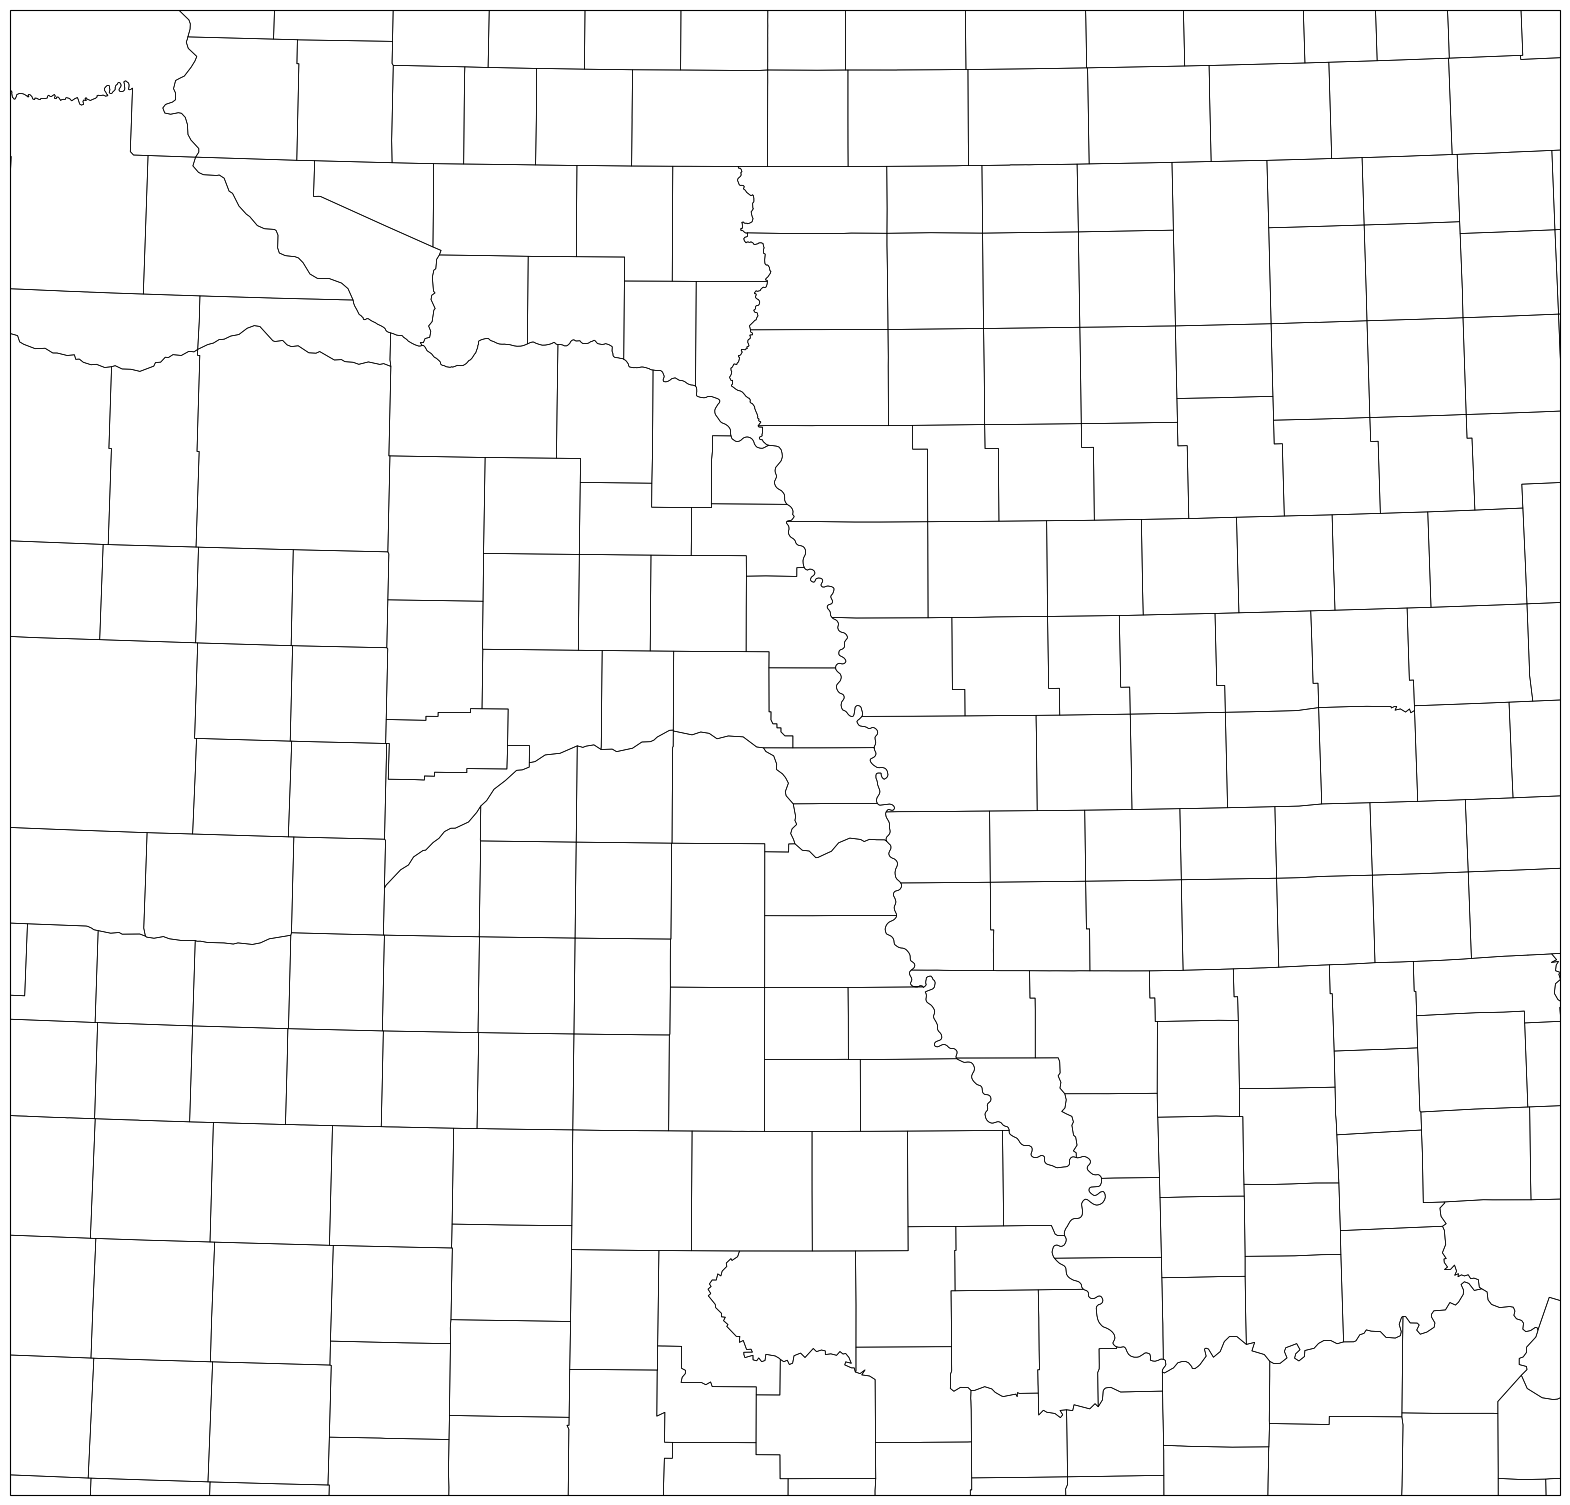

In [82]:
# Plot the dataset
proj = ccrs.LambertConformal(central_longitude=cent_lon, central_latitude=cent_lat)
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(1, 1, 1, projection=proj)
ax.set_extent([xlocs.min(), xlocs.max(), ylocs.min(), ylocs.max()])
ax.add_feature(USCOUNTIES.with_scale('5m'), edgecolor='black', linewidth=0.5)

hail = data.where(data >= 10).where(data <= 12)

# Plot the data
hail.plot.pcolormesh(ax=ax, x="longitude", y="latitude", transform=ccrs.PlateCarree(), colors=["transparent", "red"], levels=2, vmax=10)

plt.show()

In [70]:
df = data.to_dataframe()
df.to_csv("radar.csv")

In [38]:
FTP_URL: str = "tgftp.nws.noaa.gov"
PRODUCT_PATH: str = "/SL.us008001/DF.of/DC.radar/DS.165h0/SI.koax"

# Get the latest radar file
import ftplib
import os

ftp = ftplib.FTP(FTP_URL)
ftp.login()
ftp.cwd(PRODUCT_PATH)

# Latest file is always sn.last
with open("sn.last", "wb") as f:
    ftp.retrbinary("RETR sn.last", f.write)